# L - Layer Neural Network
I will be making a neural network that has an adjustable number of layers and neurons. The activation function per layer can also be changed from either relu, sigmoid or tanh. I will be using a hte MNIST dataset and predict whether the image is the number one (1) or it is a different digit in which I will use a zero (0). I got the MNIST dataset from kaggle so, it might no longer be the original. The main point of this exercise is to showcase my knowledge of Neural Networks by coding it without the use of any machine learning packages. I learned how to do this from Andrew NG's deep learning coursera class so, there will be similarities from his lecture.

In [1908]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1909]:
MNIST = pd.read_csv('MNIST.csv')

In [1910]:
MNIST.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1911]:
MNIST.shape

(42000, 785)

In [1912]:
MNIST.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Samples
#### The Number One

In [1913]:
np.sqrt(784)

28.0

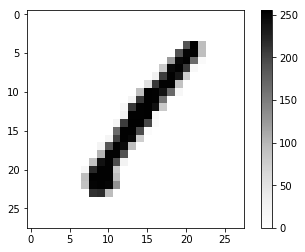

In [1914]:
digit_num = 0
t = MNIST.drop('label',1)
grid_data = t.iloc[digit_num].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "Greys")
plt.colorbar()

#### Other Numbers

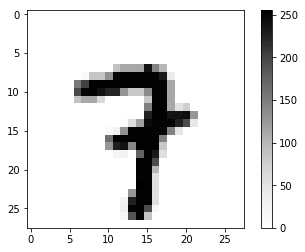

In [1915]:
digit_num = 7001
grid_data = t.iloc[digit_num].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "Greys")
plt.colorbar()

In [1916]:
def convert_to_zero(data):
    if data['label'] != 1:
        label = 0
    else:
        label = 1
    return label

In [1917]:
MNIST['label'] = MNIST.apply(convert_to_zero,axis=1)

### Dividing the dataset into equal parts

In [1918]:
4684*2 #Number of 1's

9368

In [1919]:
def ones_only(data):
    if data['label'] == 1:
        label1 = 1
    else:
        label1 = np.random.uniform()
    return label1

In [1920]:
MNIST['label1'] = MNIST.apply(ones_only,axis=1)

In [1921]:
MNIST.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.311740
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.290157
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.236799


In [1922]:
MNIST = MNIST.sort_values(by='label1',ascending=False)

In [1923]:
MNIST = MNIST[:9368]

In [1924]:
MNIST = MNIST.drop(['label1'],axis=1)

In [1925]:
MNIST.label.value_counts()

1    4684
0    4684
Name: label, dtype: int64

### Dividing the data into train, dev and test sets:

In [1926]:
MNIST.shape

(9368, 785)

10% will be allocated for the dev set and another 10% for the test set.

In [1927]:
9368*.1 

936.8000000000001

In [1928]:
MNIST['permutation'] = np.random.permutation(9368)

Check if the one's and zero's are equal if not manually divide it into equal parts. I will be using the first 10% of the data for the test set.

In [1929]:
MNIST[MNIST.permutation<936].label.value_counts()

1    497
0    439
Name: label, dtype: int64

In [1930]:
test = MNIST[MNIST.permutation<936]

I will be using the last 10% of the data for the dev set.

In [1931]:
9368 - 936

8432

In [1932]:
MNIST[MNIST.permutation>8432].label.value_counts()

1    472
0    463
Name: label, dtype: int64

In [1933]:
dev = MNIST[MNIST.permutation>8432]

I will check if the leftover data is balanced and if they are I will assign them into the training set and if not I will manually balance them.

In [1934]:
MNIST[(MNIST.permutation<8432) & (MNIST.permutation>936)].label.value_counts()

0    3781
1    3714
Name: label, dtype: int64

In [1935]:
train = MNIST[(MNIST.permutation<8432) & (MNIST.permutation>936)]

In [1936]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,permutation
24417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2474
24443,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3909
24448,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1612
24460,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6883
24467,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3820


In [1937]:
train_x = train.drop('label', 1)
train_x = train_x.drop('permutation', 1)
train_x = train_x.T
train_y = train['label']
train_y = train_y.values.reshape((1,train_y.shape[0]))

test_x = test.drop('label', 1)
test_x = test_x.drop('permutation', 1)
test_x = test_x.T
test_y = test['label']
test_y = test_y.values.reshape((1,test_y.shape[0]))

dev_x = dev.drop('label', 1)
dev_x = dev_x.drop('permutation', 1)
dev_x = dev_x.T
dev_y = dev['label']
dev_y = dev_y.values.reshape((1,dev_y.shape[0]))

# L-layer Neural Network


### Initialize_parameters
This is the method that initializes the parameter W for weights and set up the architecture of the neural network. It uses random numbers between Zero and One for initialization. Initializing the bias into a random number almost makes no difference so, I wont be initializing into a random number but just zeros. There are a research that suggest different methods of initializing the weights however, it is not in the scope of this exercise. The list layer_dims will dictate how many neurons there are based on each digit on the list and each digit on the list represents a layer. 

Ex. layer_dims = [5,3,1], this is a neural network with 5 neurons in the first layer, 3 neurons in the second layer and 1 node in the last layer.

 
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)

In [1938]:
def initialize_parameters(layer_dims):
    
    parameters = {}
    L = len(layer_dims)           

    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
      
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

## Forward Propagation

### linear_forward

This is in the forward propagation phase. It performs the dot product of the previous layer's output with the current layer's weights.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently

In [1939]:
def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

### Acitivation Funtions 
Activation functions are the building blocks of our Neural Network. Each activation function represents the neuron of our brain. It performs the most basic predictions. Alone, they are weak however once they are linked together they have limitless potential. There are a number of Activations out there but I will be only using the most basic ones.

#### Relu Function
<p>The Relu Function is a piecewise function that basically gets rid of negative numbers and replaces them with a 0. </p>


if X > 0 then X 


if X < 0 then 0

In [1940]:
def relu(z):
    r = z * (z > 0)
    return r,z 

#### Sigmoid Function
The Sigmoid Function has a Range(Y) from 0 to 1 and has Domain(X) of negative infinity to positive infinity. It's purpose is that no matter how big or how small you a number you give it, it will output a number between 0 and 1.


Sigmoid(x) = 1/(1+e^-x)

In [1941]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s,z

#### Tanh Function
This is similar to the sigmoid function however its range is from -1 to 1. So, we dont have to worry as much for the weights to blow up. 

Tanh = (2/(1+e^-x)) - 1
     = 2Sigmoid(2x) - 1

In [1942]:
def tanh(z):
    t = (2/(1+np.exp(-z))) - 1
    return t,z

### linear_activation_forward
Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently


In [1943]:
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z)
        
    elif activation == "tanh":
        A, activation_cache = tanh(Z)
    
    else:
        print("Error in Activation")
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

### L_model_forward
This is where we bring the whole forward propagation together. This loops the linear_activation_forard method into all the layers. In the final layer we apply the sigmoid function because we want the output to be between 1 and 0. For all the other layers we will be using the relu.

    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)


In [1944]:
def L_model_forward(X, parameters,activation):

    caches = []
    A = X
    L = len(parameters) // 2             
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)], parameters['b' + str(l)], activation=activation[l])
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)], parameters['b' + str(L)], activation='sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
    assert (L == len(activation))
    return AL, caches

## Cost Function

### compute_cost
The cost function is the function that we will be minimizing using gradient decent. The cost function measures the accuracy of our model. For this exercise we will be using the cross entropy cost for our cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    

In [1945]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL))+((1-Y)*np.log(1-AL)))
    cost = np.squeeze(cost)   
    assert(cost.shape == ())
    
    return cost

## Backward Propagation

### relu_backward
Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z


In [1946]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0 
    assert (dZ.shape == Z.shape)
    
    return dZ

### sigmoid_backward
Implement the backward propagation for a single SIGMOID unit.
    
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- \'Z\' where we store for computing backward propagation efficiently
    
    Returns:
    dZ -- Gradient of the cost with respect to Z


In [1947]:
def sigmoid_backward(dA, cache):

    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    
    return dZ

#### tanh_backward
Implement the backward probagaytion for a single TanH unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- \'Z\' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z

In [1948]:
def tanh_backward(dA, cache):
    
    Z = cache
    s = np.tanh(-Z)#(2/(1+np.exp(-Z))) - 1
    dZ = 1 - (s**2)
    assert (dZ.shape == Z.shape)
    
    return dZ

### linear_backward
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b


In [1949]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

### linear_activation_backward
Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b


In [1950]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db =  linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db =  linear_backward(dZ, linear_cache)
        
    elif activation == "tanh":
        dZ = tanh_backward(dA,activation_cache)
        dA_prev, dW, db =  linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### model_backward
Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 

In [1951]:
def model_backward(AL, Y, caches,activation):

    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = 'sigmoid')

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = activation[l])
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### update_parameters
We will take what the algorithm has learned from gradient descent and update the parameters

    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...

In [1952]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate* grads["dW" + str(l + 1)] 
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate* grads["db" + str(l + 1)] 
        
    return parameters

### L_layer_model
Putting the whole model together. Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.


In [1953]:
def L_layer_model(X, Y, layers_dims,activation, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    costs = []                         
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters,activation)
        cost = compute_cost(AL, Y)
        grads = model_backward(AL, Y, caches,activation)
        parameters =  update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

### predict
    This function is used to predict the results of our model.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X


In [1954]:
def predict(X, y, parameters,activation):

    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters,activation)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        
        else:
            p[0,i] = 0

    print("Number of Ones = "+str(np.sum(p)))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    assert (n == len(activation))

## Testing our Model

#### Train a simple model to start that we can easily tweak

In [1955]:
layers_dims = [train_x.shape[0],12,7, 1]
activation = ["sigmoid","relu","tanh"]

Cost after iteration 0: 0.692414
Cost after iteration 10: 0.691262
Cost after iteration 20: 0.689016
Cost after iteration 30: 0.684478
Cost after iteration 40: 0.676106
Cost after iteration 50: 0.662631
Cost after iteration 60: 0.645388
Cost after iteration 70: 0.629639
Cost after iteration 80: 0.612987
Cost after iteration 90: 0.595262
Cost after iteration 100: 0.576206
Cost after iteration 110: 0.548830
Cost after iteration 120: 0.522127
Cost after iteration 130: 0.496882
Cost after iteration 140: 0.473557
Cost after iteration 150: 0.452107
Cost after iteration 160: 0.430224
Cost after iteration 170: 0.414534
Cost after iteration 180: 0.405106
Cost after iteration 190: 0.400777
Cost after iteration 200: 0.392853
Cost after iteration 210: 0.396307
Cost after iteration 220: 0.379641
Cost after iteration 230: 0.376741
Cost after iteration 240: 0.339502
Cost after iteration 250: 0.239166
Cost after iteration 260: 0.304346
Cost after iteration 270: 0.307564
Cost after iteration 280: 0.206

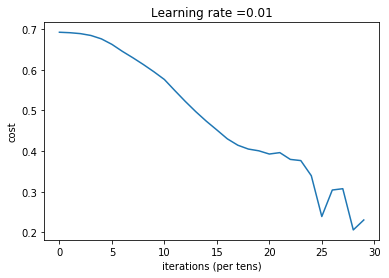

In [1956]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 300, print_cost = True,learning_rate=.01,activation = activation)

In [1957]:
predict(train_x, train_y, parameters,activation)#0.999066044029

Number of Ones = 3036.0
Accuracy: 0.905537024683


In [1958]:
predict(test_x, test_y, parameters,activation)#0.987179487179

Number of Ones = 414.0
Accuracy: 0.909188034188


#### Deeper Network

In [1965]:
layers_dims = [train_x.shape[0],40,35,30,25,20,15,10,5, 1]
activation = ["relu","relu","relu","relu","relu","relu","relu","relu","relu"]

Cost after iteration 0: 0.693147
Cost after iteration 10: 0.693107
Cost after iteration 20: 0.693107
Cost after iteration 30: 0.693107
Cost after iteration 40: 0.693107
Cost after iteration 50: 0.693107
Cost after iteration 60: 0.693107
Cost after iteration 70: 0.693107
Cost after iteration 80: 0.693107
Cost after iteration 90: 0.693107


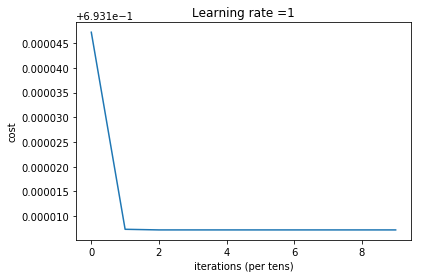

In [1966]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 100, print_cost = True,learning_rate=1,activation=activation)

In [1968]:
predict(train_x, train_y, parameters,activation)

Number of Ones = 0.0
Accuracy: 0.504469646431


In [1969]:
predict(test_x, test_y, parameters,activation)

Number of Ones = 0.0
Accuracy: 0.469017094017


This is just far too complex for our very simple problem furthermore, it is not learning.

In [1970]:
layers_dims = [train_x.shape[0],10,4, 1]
activation = ["tanh","relu","relu"]

Cost after iteration 0: 0.692847
Cost after iteration 10: 0.690583
Cost after iteration 20: 0.674068
Cost after iteration 30: 0.351081
Cost after iteration 40: 0.090660
Cost after iteration 50: 0.072699
Cost after iteration 60: 0.066482
Cost after iteration 70: 0.062861
Cost after iteration 80: 0.060194
Cost after iteration 90: 0.058033
Cost after iteration 100: 0.056138
Cost after iteration 110: 0.054404
Cost after iteration 120: 0.052871
Cost after iteration 130: 0.051480
Cost after iteration 140: 0.050214
Cost after iteration 150: 0.049046
Cost after iteration 160: 0.047986
Cost after iteration 170: 0.047008
Cost after iteration 180: 0.046093
Cost after iteration 190: 0.045215
Cost after iteration 200: 0.044381
Cost after iteration 210: 0.043587
Cost after iteration 220: 0.042821
Cost after iteration 230: 0.042070
Cost after iteration 240: 0.041335
Cost after iteration 250: 0.040616
Cost after iteration 260: 0.039913
Cost after iteration 270: 0.039209
Cost after iteration 280: 0.038

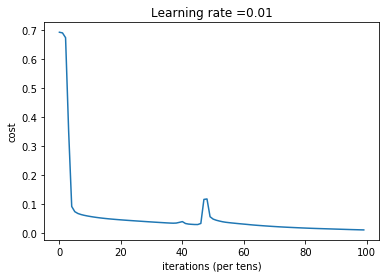

In [1971]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1000, print_cost = True,learning_rate=.01,activation=["relu","relu","relu"])

In [1972]:
predict(train_x, train_y, parameters,activation)

Number of Ones = 3708.0
Accuracy: 0.998132088059


In [1973]:
predict(test_x, test_y, parameters,activation)

Number of Ones = 499.0
Accuracy: 0.980769230769


In [1974]:
predict(dev_x, dev_y, parameters,activation)

Number of Ones = 472.0
Accuracy: 0.985026737968


### This gives us an accuracy of ~99%